### <b>KELOMPOK 5<b> - KLASIFIKASI SAYURAN
##### Muhammad Amri Rasyid Ramadhan 2009106047
##### Muhammad Fathir Fahreza - 2009106024
##### Hadi Bayu Saputra - 2009106006

#### <b>Import Library<b>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#### **Load Data**

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (120, 120)

trainPath = 'Vegetable Images/train/'
valPath = 'Vegetable Images/validation/'
testPath = 'Vegetable Images/test/'

In [5]:
#Training
train = tf.keras.utils.image_dataset_from_directory(trainPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(valPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Test
test = tf.keras.utils.image_dataset_from_directory(testPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [6]:
# class names
class_names = train.class_names
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

#### **Visualisasi Data**

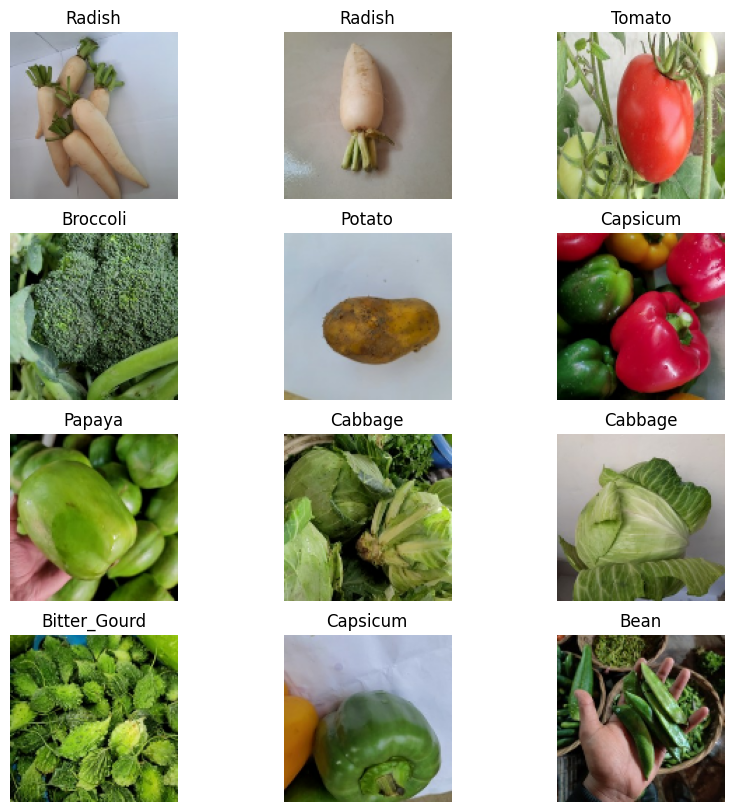

In [7]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [8]:
trainTemp = train.unbatch()
labels = []
for x, y in trainTemp:
    index = np.argmax(y)
    labels.append(class_names[index])

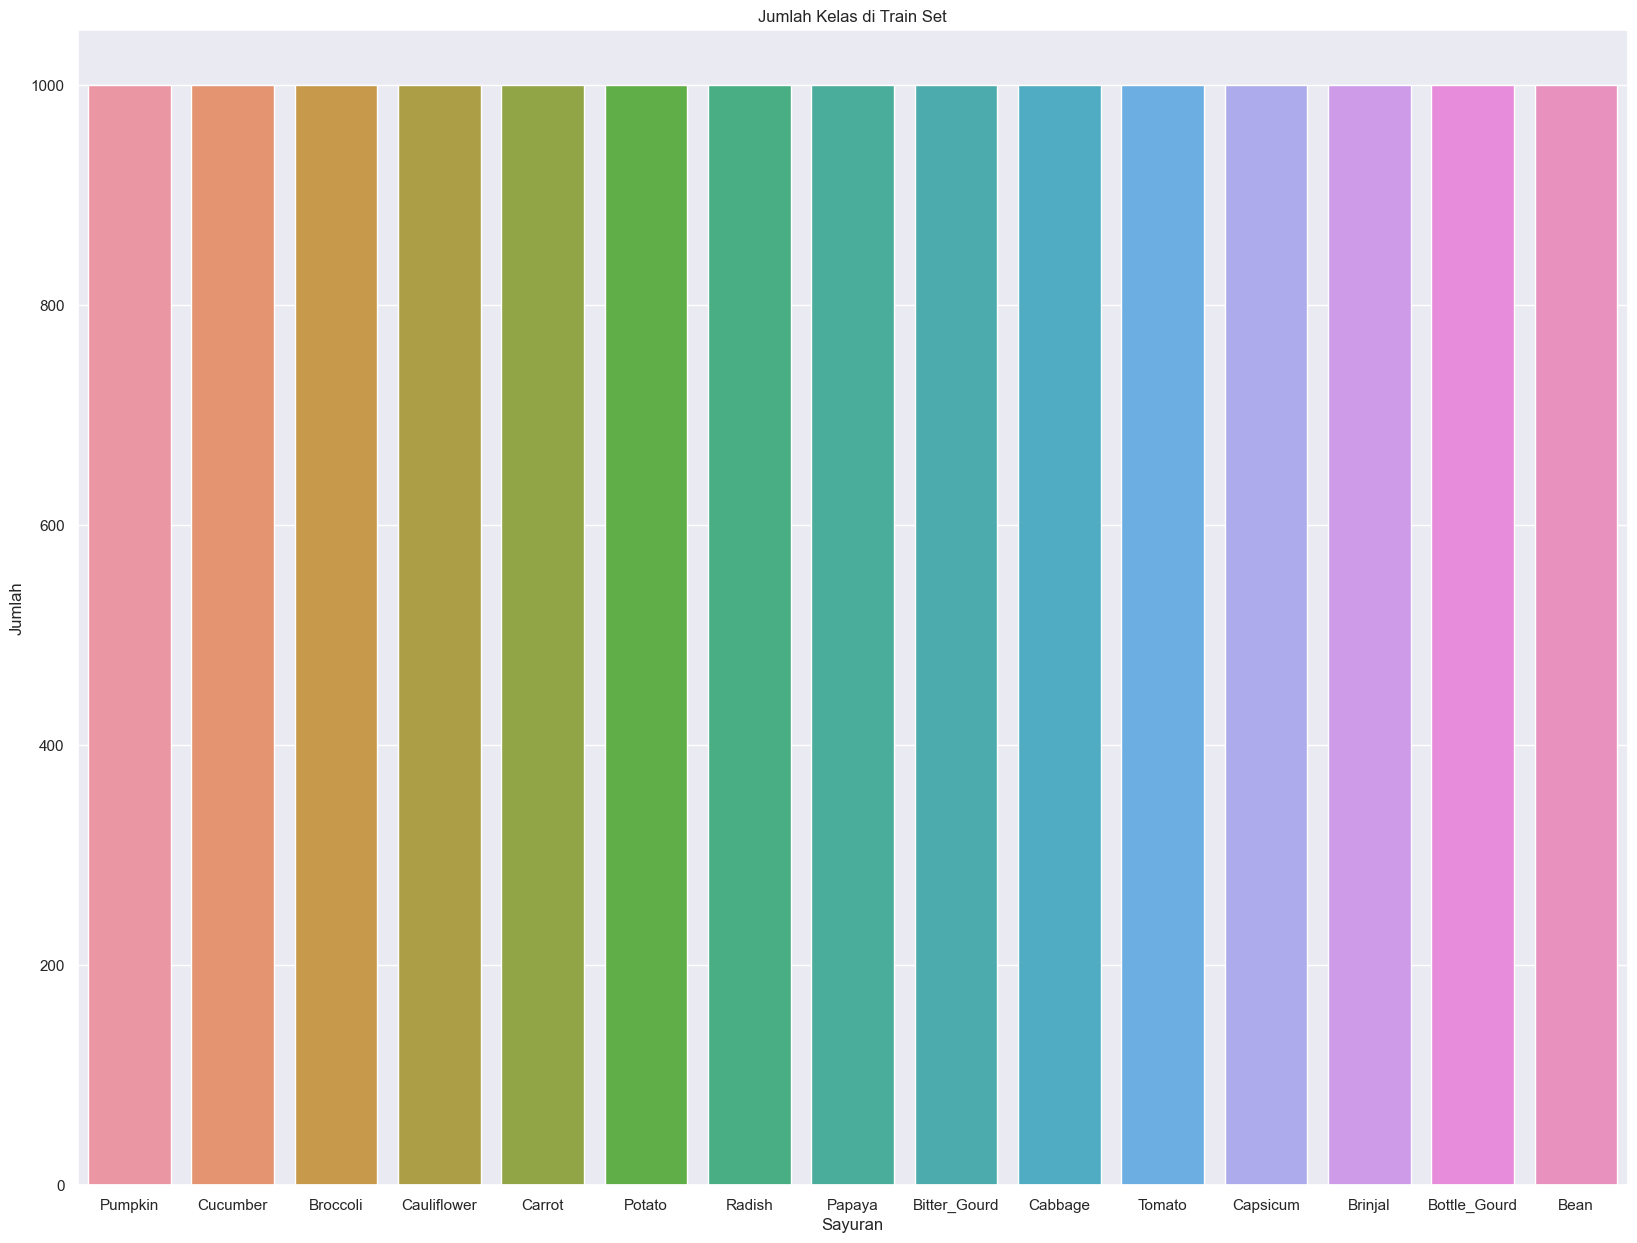

In [18]:
plt.figure(figsize=(20, 15))

sns.set_theme()


sns.countplot(x=labels)
plt.xlabel('Sayuran')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Set')
plt.show()

#### **Preprocessing**

In [72]:
#Normalisasi
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

#Grayscale
def rgb2gray(image, label):
  return tf.image.rgb_to_grayscale(image), label

#Tambah tingkat keterangan
def random_brightness(image, label):
  return tf.image.random_brightness(image,max_delta=0.5), label


def augment_using_ops(images, labels):
	images = tf.image.random_flip_left_right(images)
	images = tf.image.random_flip_up_down(images)
	images = tf.image.rot90(images)
	return images, labels

In [73]:
train = train.map(rgb2gray).map(random_brightness).map(augment_using_ops)
test = test.map(rgb2gray).map(normalize_img)
validation = validation.map(rgb2gray).map(normalize_img)

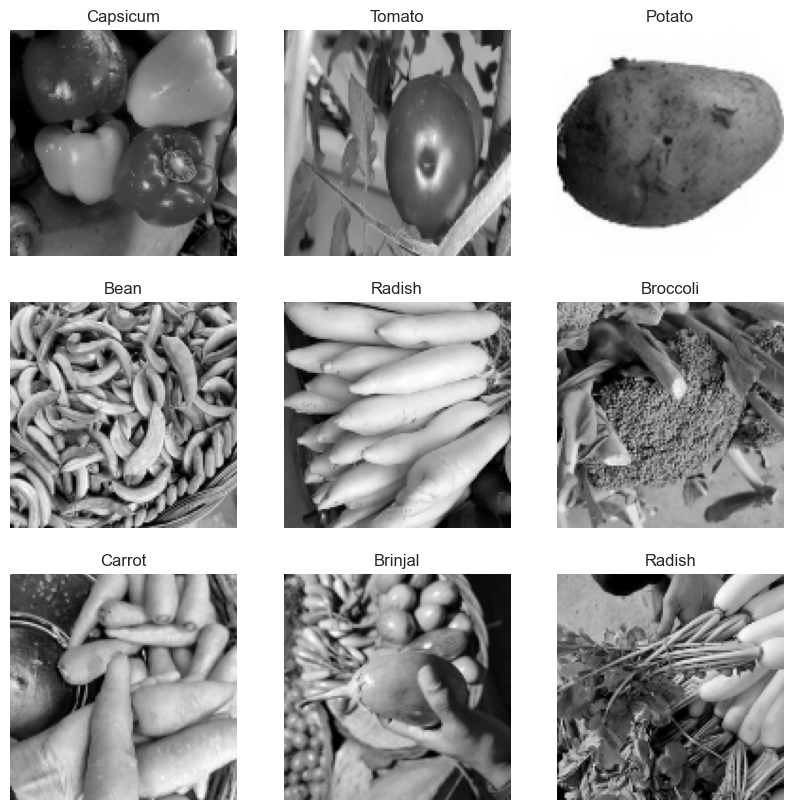

In [74]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

#### **Modeling**

In [10]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=[256, 256, 1]),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.6),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(7, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 flatten (Flatten)           (None, 61504)             0

In [12]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [13]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)